In [7]:
# pip install -U scikit-learn --user

In [8]:
# pip install pandas

In [9]:
# pip install seaborn

In [17]:
import torch
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
path = 'https://raw.githubusercontent.com/u-nivusJO/data_file/main/airquality.csv'
data = pd.read_csv(path)

# 1. 데이터 마이닝 

In [11]:
# 상위 5개행 확인(하위는 tail)
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [13]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [14]:
# 기초통계량 확인
data.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [15]:
# 상관관계 확인
data.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.348342,-0.601547,0.698360,0.164519,-0.013226
Solar.R,0.348342,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.601547,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.698360,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.164519,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,-0.013226,-0.150275,0.027181,-0.130593,-0.007962,1.000000


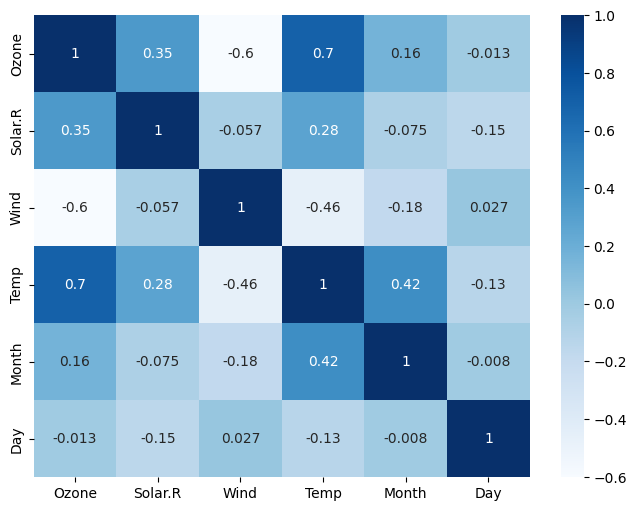

In [19]:
# 상관관계 시각화
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='Blues') 
# annot : 숫자보이게, cmap : 색상
plt.show()

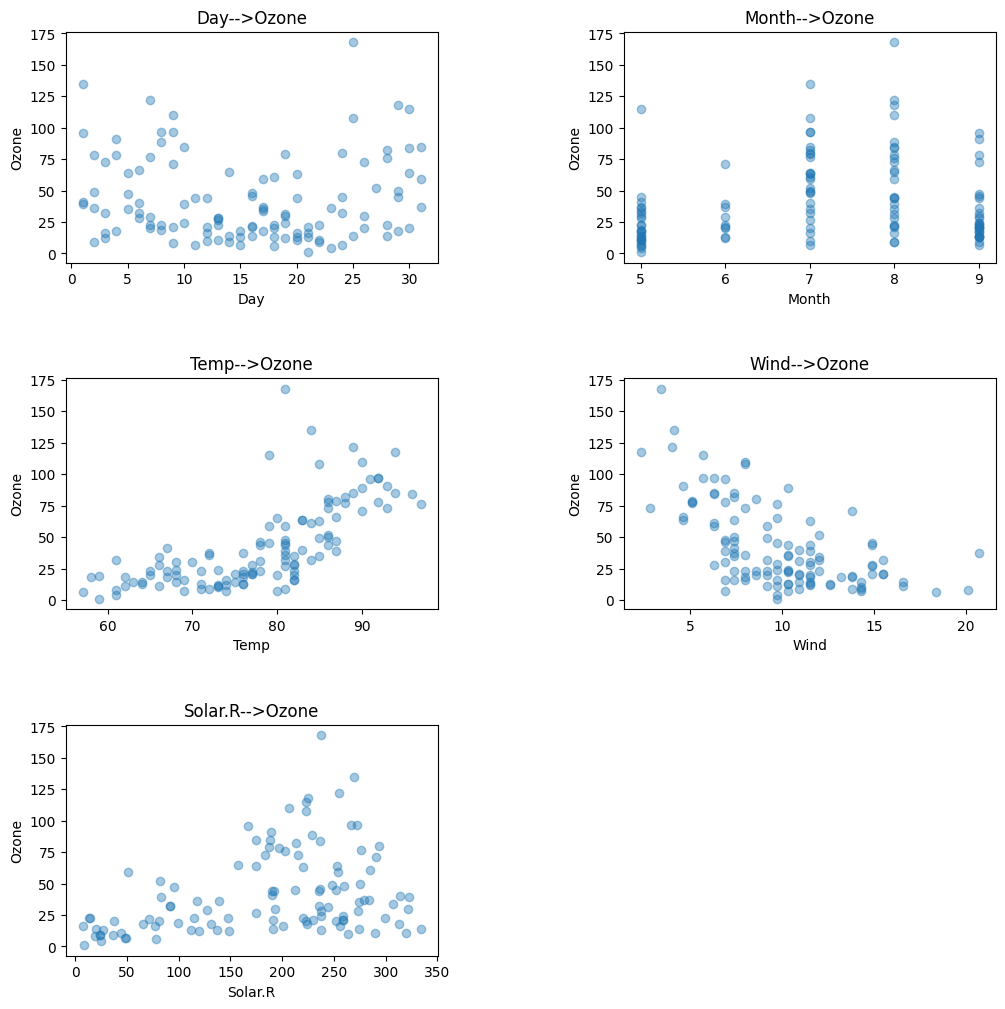

In [45]:
# Ozone과의 상관관계를 산점도로 나타내기 
fig=plt.figure(figsize=(12,12))

# 1. Day-->Ozone 상관관계
corr1=plt.subplot(321)
corr1.scatter(data['Day'], data['Ozone'], alpha = 0.4)
# alpha : 투명도
corr1.set_xlabel('Day')
corr1.set_ylabel('Ozone')
corr1.set_title('Day-->Ozone')

# 2. Month-->Ozone 상관관계
corr2=plt.subplot(322)
corr2.scatter(data['Month'], data['Ozone'], alpha = 0.4)
corr2.set_xlabel('Month')
corr2.set_ylabel('Ozone')
corr2.set_title('Month-->Ozone')

# 3. Temp-->Ozone 상관관계
corr3=plt.subplot(323)
corr3.scatter(data['Temp'], data['Ozone'], alpha = 0.4)
corr3.set_xlabel('Temp')
corr3.set_ylabel('Ozone')
corr3.set_title('Temp-->Ozone')

# 4. Wind-->Ozone 상관관계
corr4=plt.subplot(324)
corr4.scatter(data['Wind'], data['Ozone'], alpha = 0.4)
corr4.set_xlabel('Wind')
corr4.set_ylabel('Ozone')
corr4.set_title('Wind-->Ozone')

# 5. Solar.R-->Ozone 상관관계
corr5=plt.subplot(325)
corr5.scatter(data['Solar.R'], data['Ozone'], alpha = 0.4)
corr5.set_xlabel('Solar.R')
corr5.set_ylabel('Ozone')
corr5.set_title('Solar.R-->Ozone')

# subplot 간 간격 조정
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [47]:
# 결측치 확인
data.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [ ]:
# 결측치 처리
# 1. Ozone은 target이므로 결측치가 없어야한다->따라서 Ozone 값이 결측치인 행 삭제
data.dropna(subnet=['Ozone'], inplace=True)
# 2. Solar.R은 선형보간법으로 결측치 채우기-이유?
